# Titanic Kaggle Challenge

The Titanic challenge hosted by Kaggle is a competition in which the goal is to predict the survival or the death of a given passenger based on a set of variables describing him such as his age, his sex, or his passenger class on the boat.

In particular, this notebook is taken from https://www.ahmedbesbes.com/blog/kaggle-titanic-competition as another version of Titanic Challenge, in order to study the difference and improve my result.

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

# EDA 
## Load Data and General Overview

In [100]:
data = pd.read_csv('data/train.csv')
print(data.shape)
data_violin = data
data_violin["Survived"].replace(0,"Dead", inplace=True)
data_violin["Survived"].replace(1,"Survived", inplace=True)
data_violin["Embarked"].replace("C","Cherbourg", inplace=True)
data_violin["Embarked"].replace("Q","Queenstown", inplace=True)
data_violin["Embarked"].replace("S","Southampton", inplace=True)

(891, 12)


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he's dead. The is the variable we're going to predict.

The other variables describe the passengers. They are the features.

* PassengerId: and id given to each traveler on the boat
* Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
* The Name of the passeger
* The Sex
* The Age
* SibSp: number of siblings and spouses traveling with the passenger
* Parch: number of parents and children traveling with the passenger
* The ticket number
* The ticket Fare
* The cabin number
* The embarkation. This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Filling Age 
data['Age'] = data['Age'].fillna(data['Age'].median())

## Targed Analysis
### Targed by Sex

Let's visualize survival based on the gender.

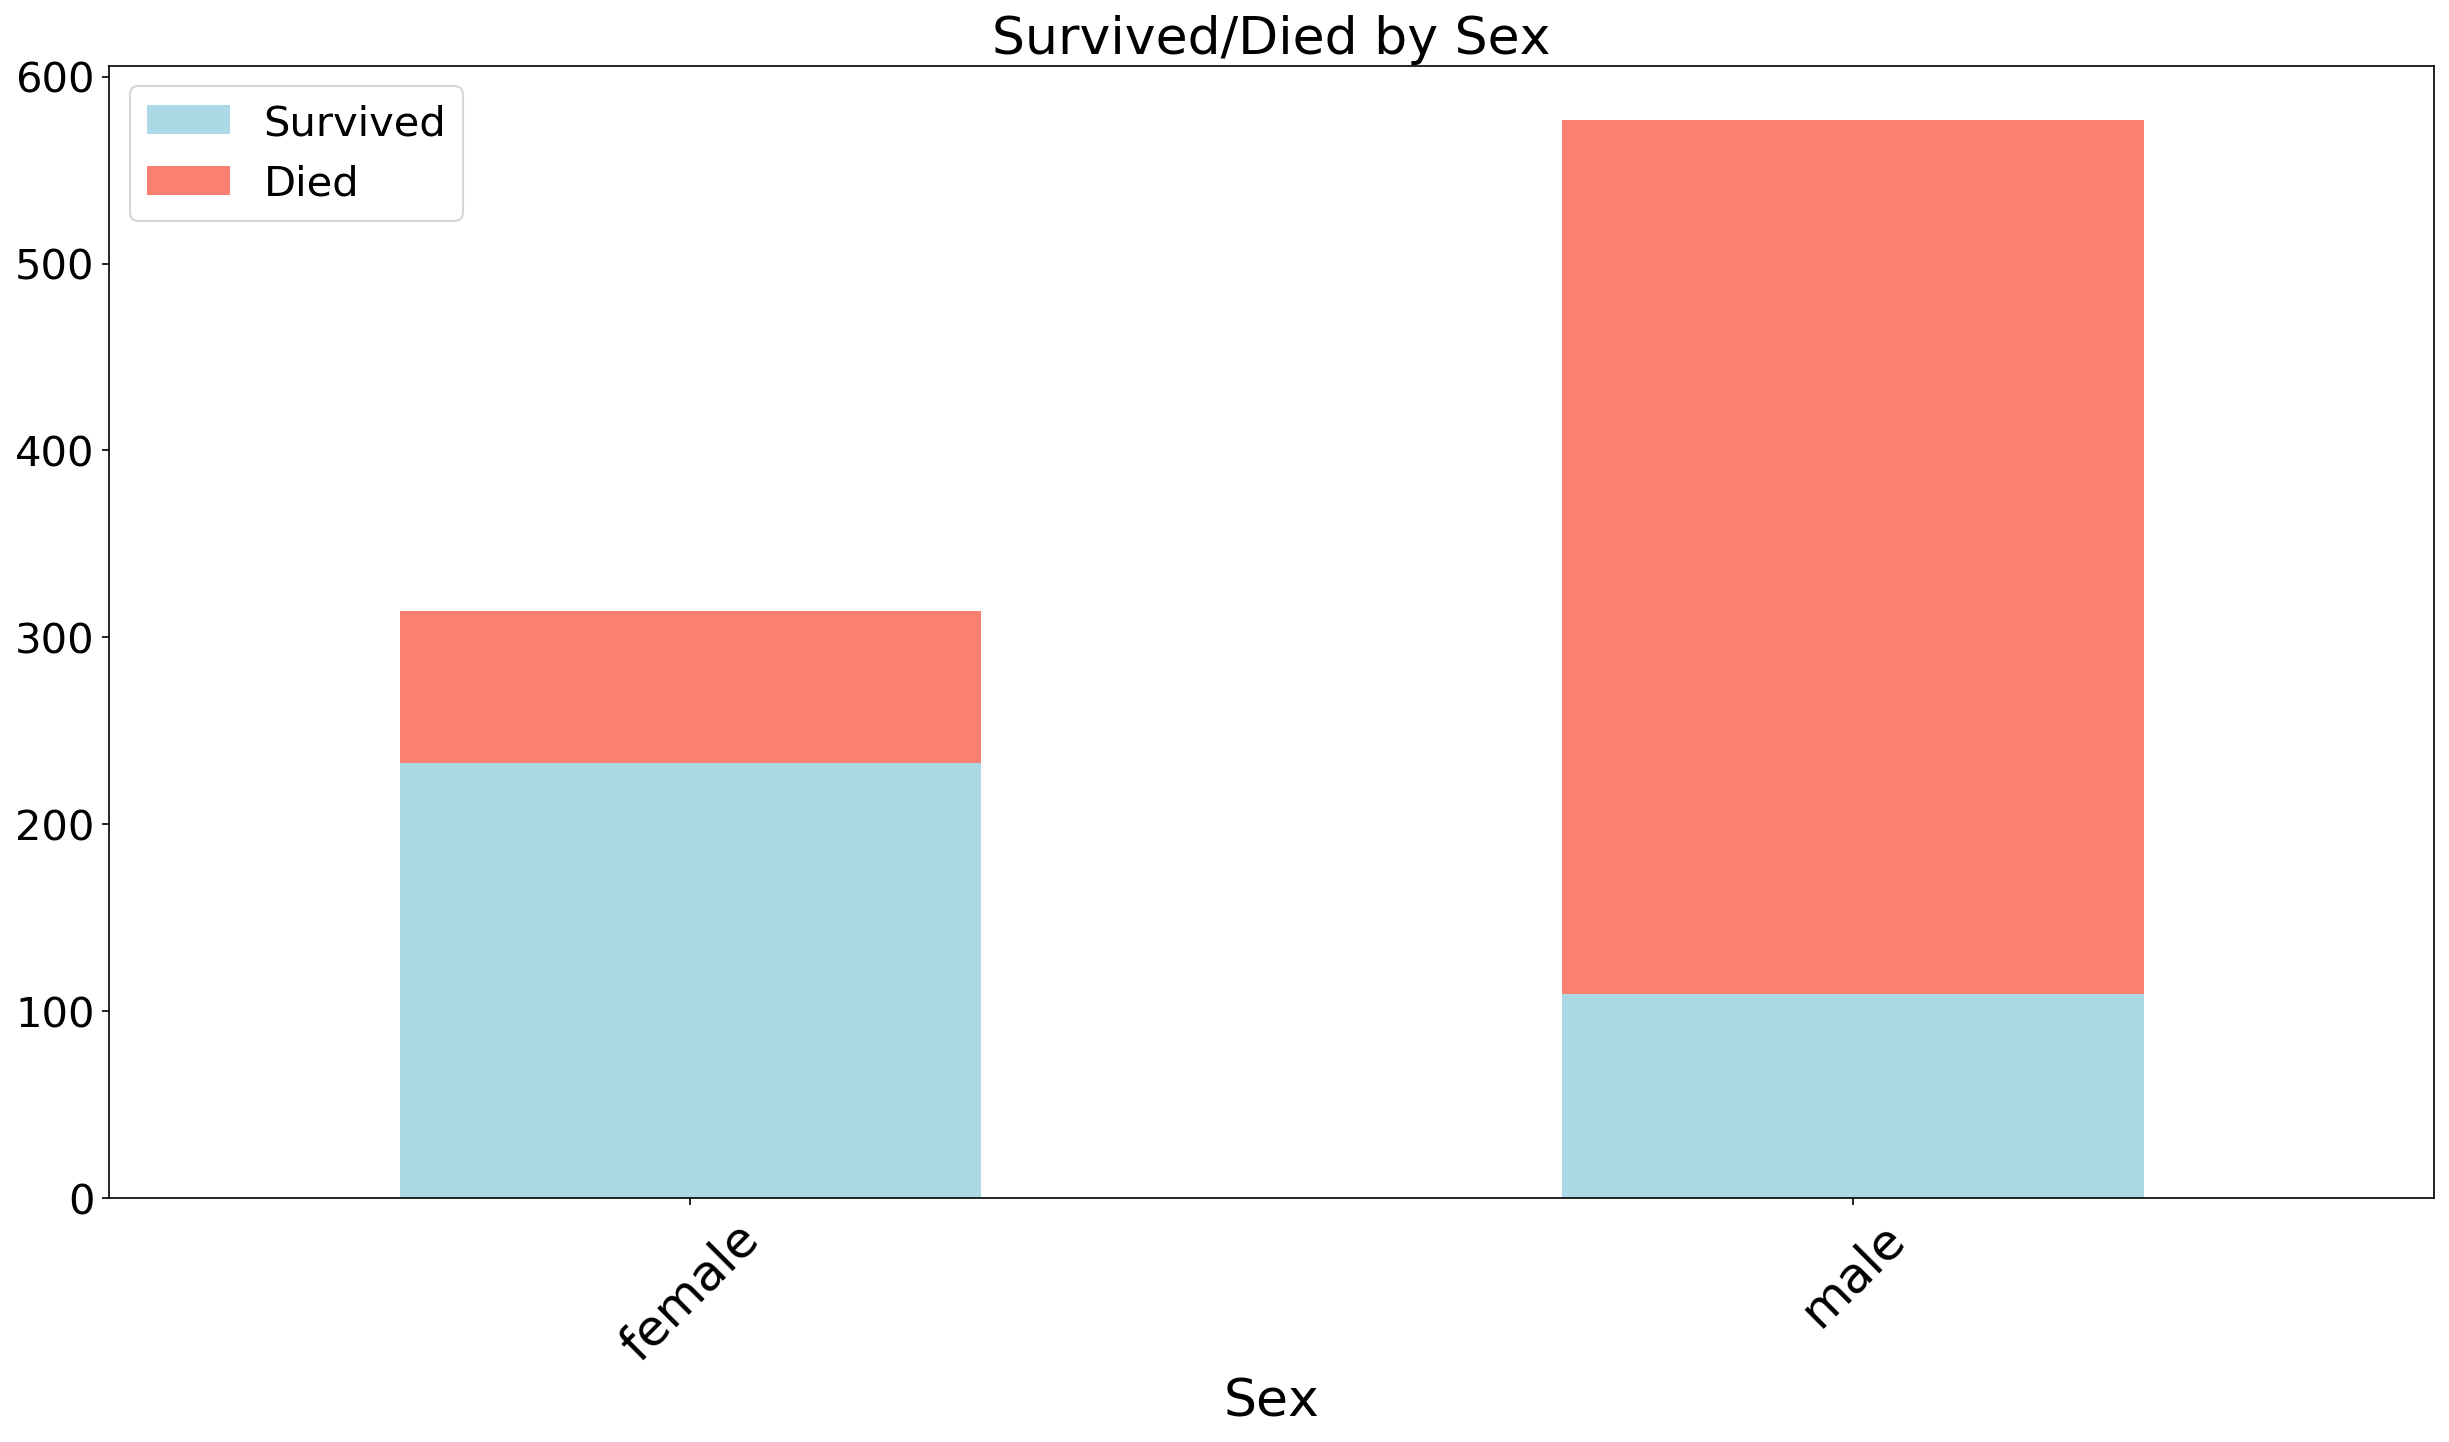

In [40]:
data['Died'] = 1 - data['Survived']
ax = data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', 
                                                               figsize=(20, 10), 
                                                               stacked=True, 
                                                               color=["lightblue", "salmon"]);
ax.tick_params(axis="x", labelsize=20)
ax.set_xlabel('Sex', fontsize=25)
ax.set_title('Survived/Died by Sex', fontsize=25)
ax.tick_params(axis="y", labelsize=20)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, fontsize=24);

It looks like male passengers are more likely to succumb.

Let's plot the same graph but with ratio instead.

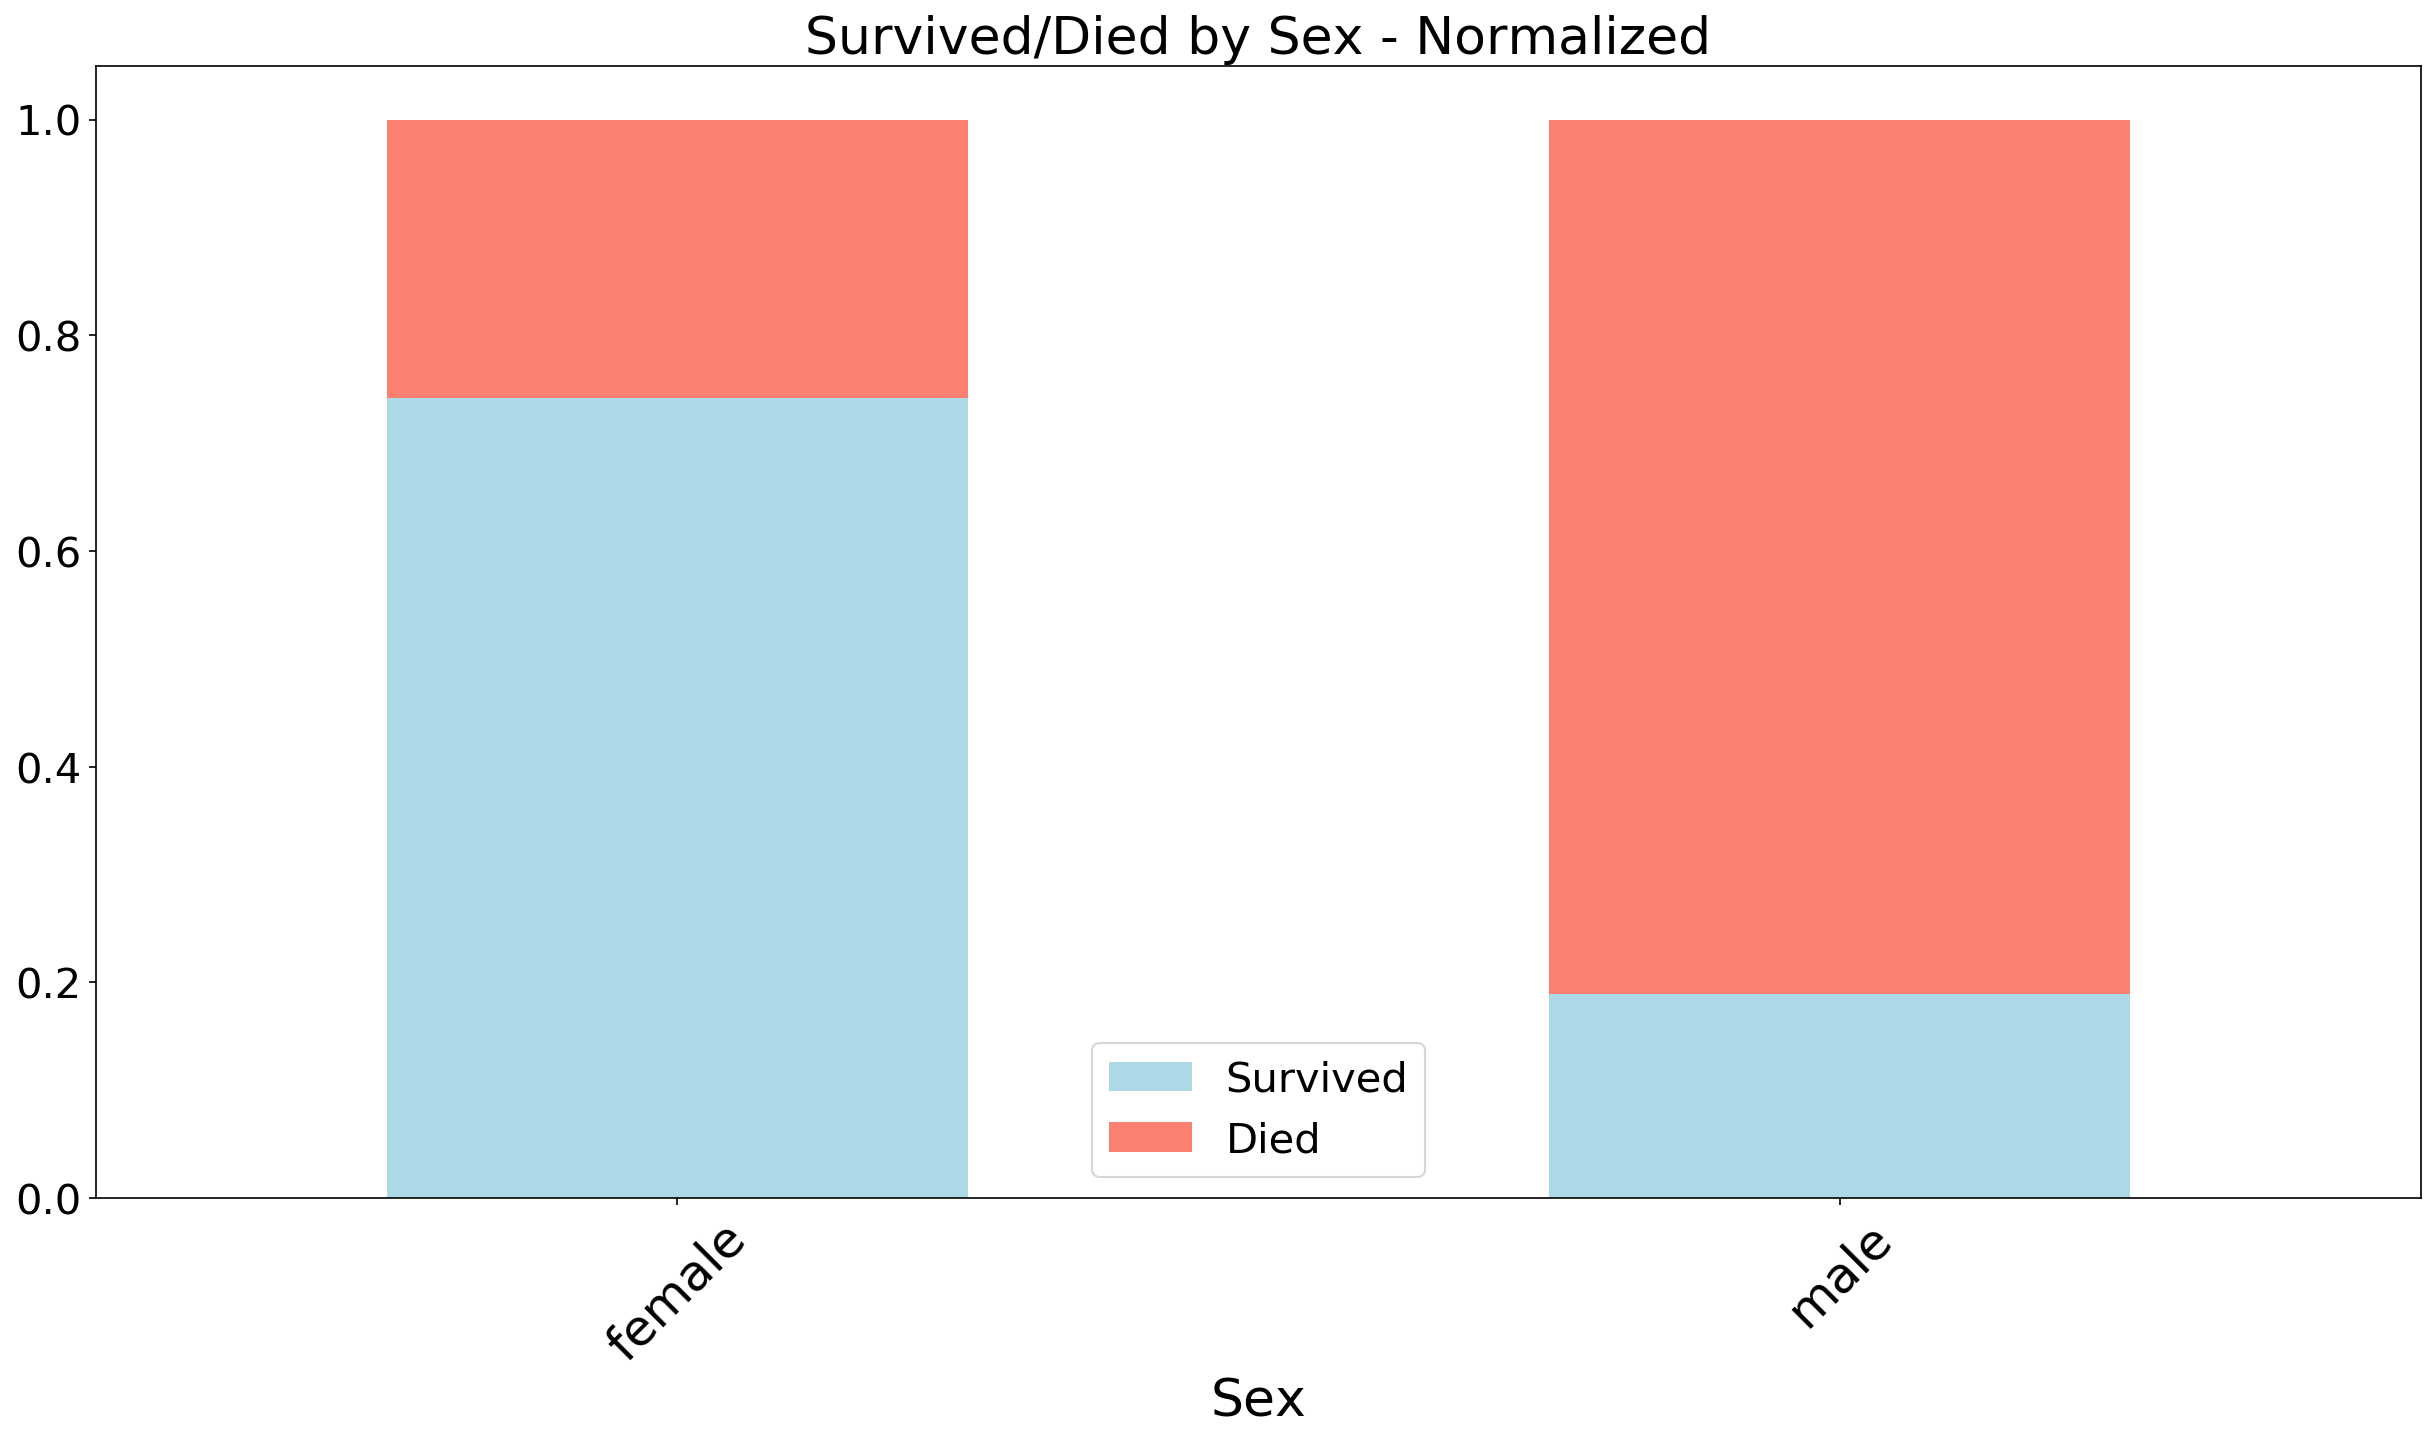

In [44]:
ax = data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', 
                                                           figsize=(20, 10), 
                                                           stacked=True, 
                                                           color=["lightblue", "salmon"]);
ax.tick_params(axis="x", labelsize=20)
ax.set_xlabel('Sex', fontsize=25)
ax.set_title('Survived/Died by Sex - Normalized', fontsize=25)
ax.tick_params(axis="y", labelsize=20)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, fontsize=24);

The Sex variable seems to be a discriminative feature. Women are more likely to survive.

### Target by Age

Let's now correlate the survival with the age variable.


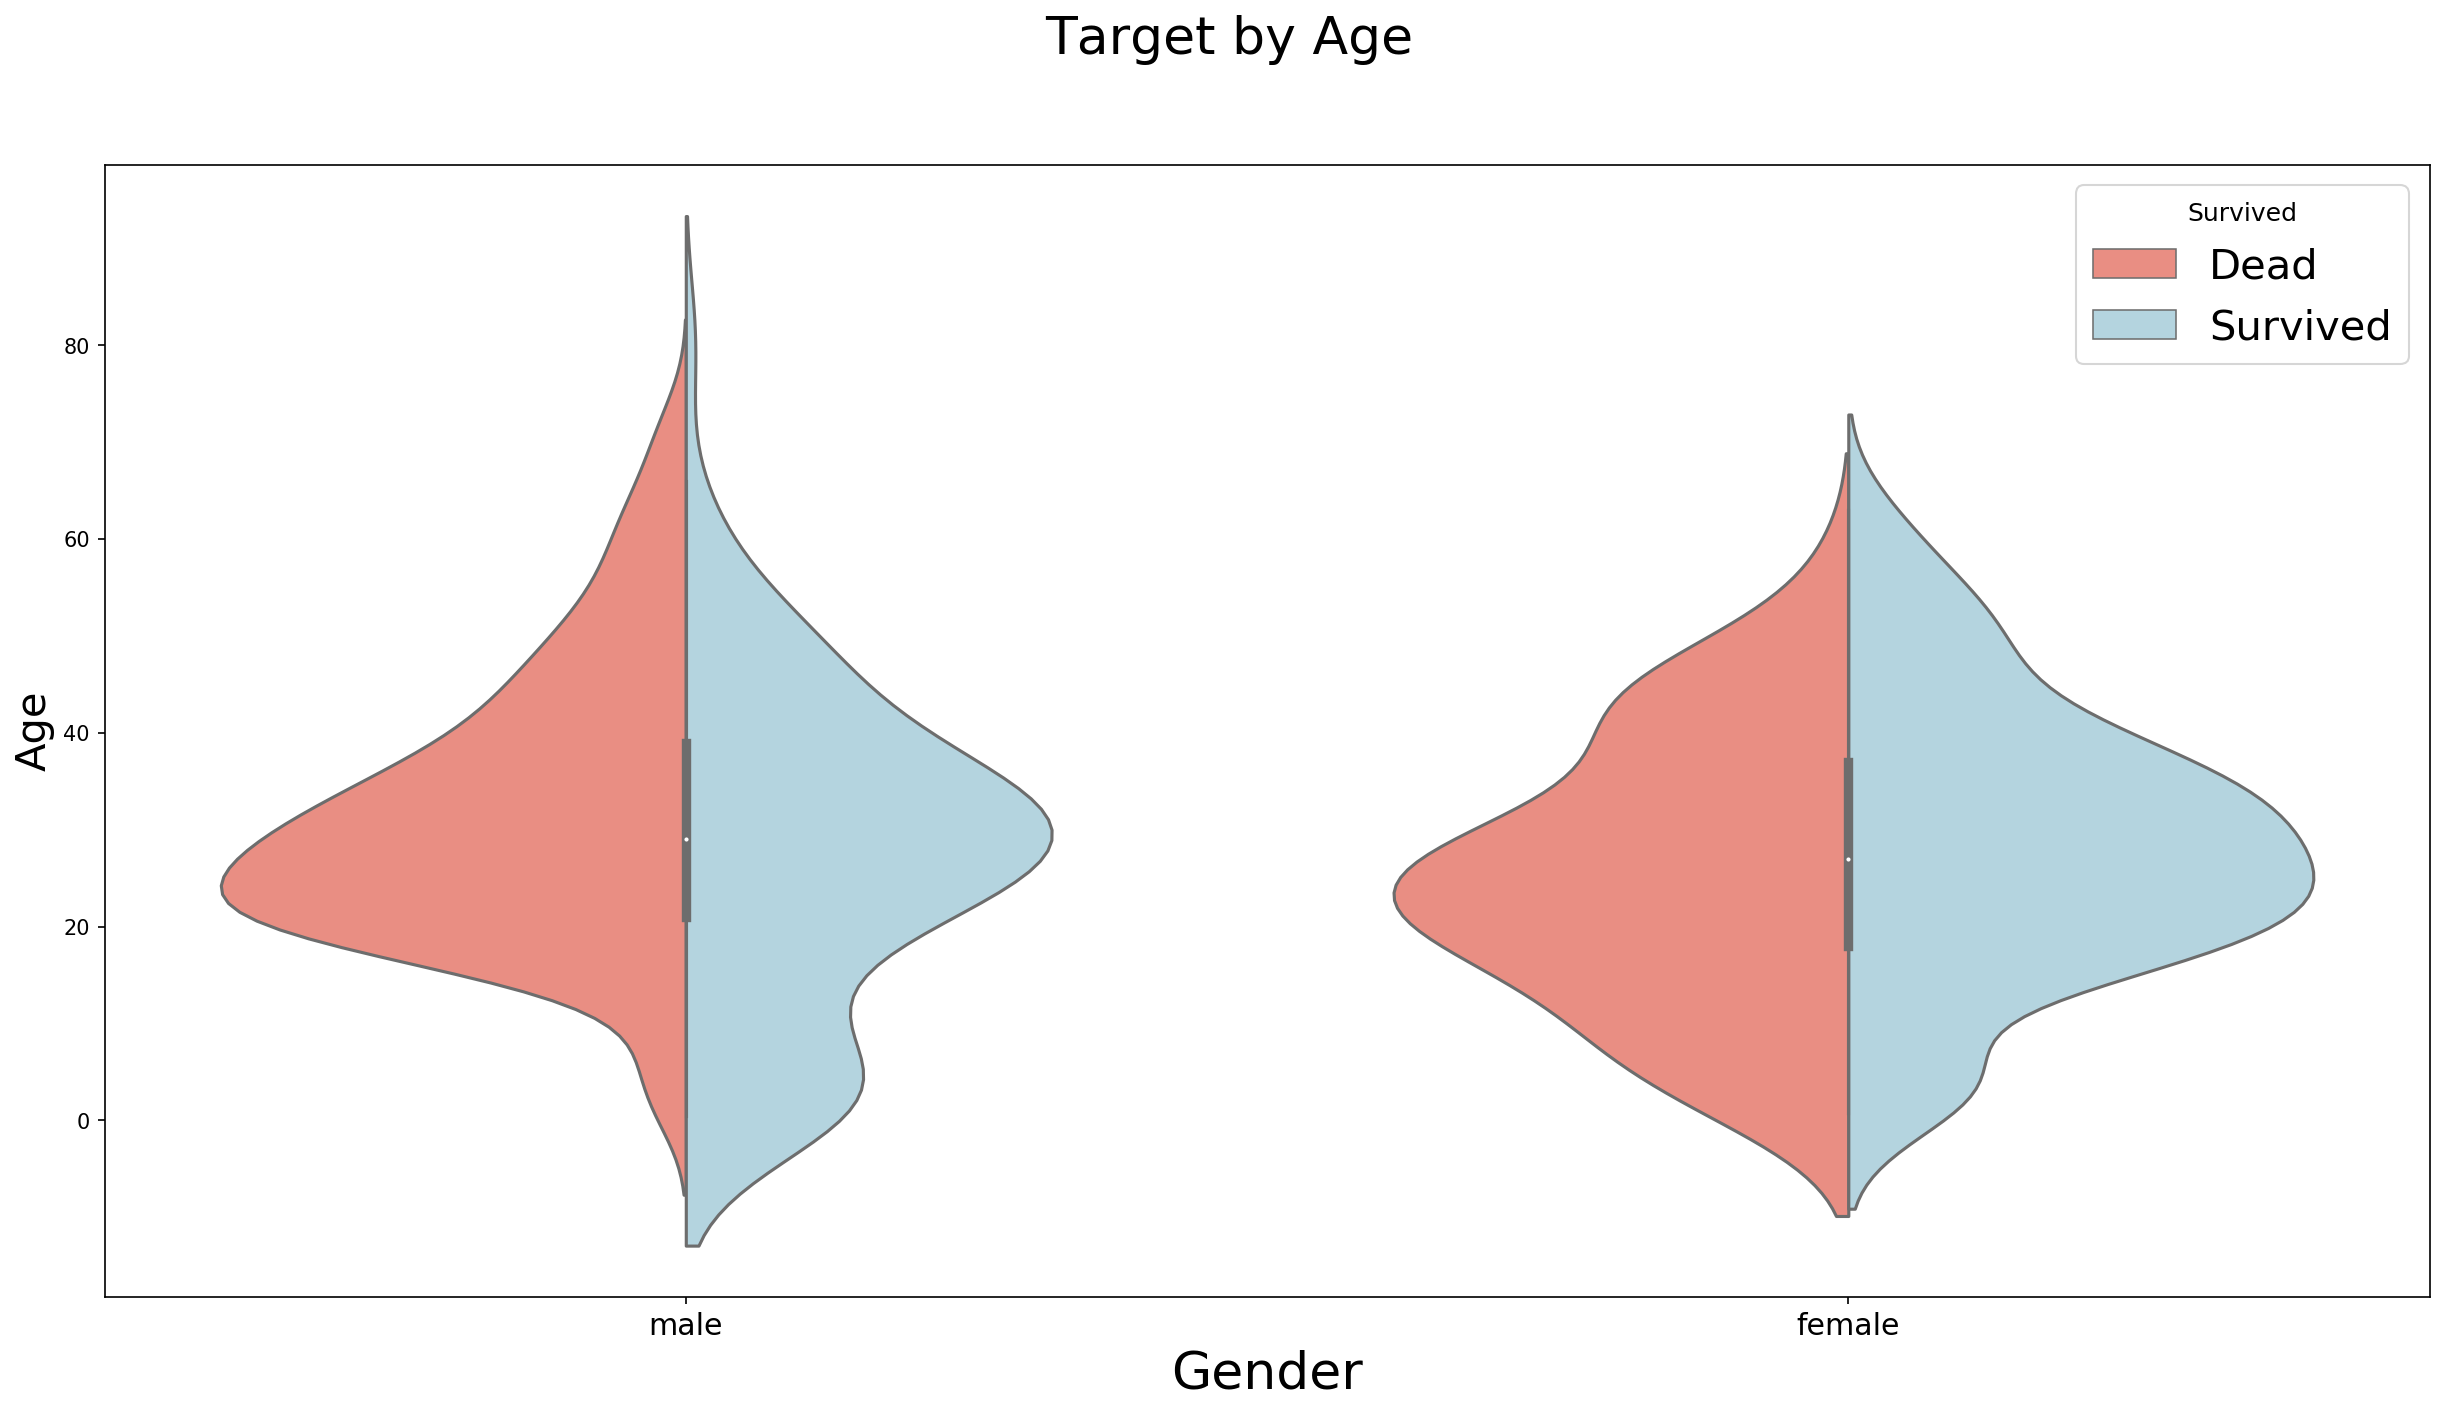

In [103]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data_violin, 
               split=True,
               palette={"Survived": "lightblue", "Dead": "salmon"}
              );
fig.suptitle("Target by Age", fontsize=25)
plt.xlabel("Gender", fontsize=25)
plt.ylabel("Age", fontsize=20);

As we saw in the chart above and validate by the following:

* Women survive more than men, as depicted by the larger female green histogram

In particular, the age conditions the survival for male passengers:

* Younger male tend to survive
* A large number of passengers between 20 and 40 succumb
* The age doesn't seem to have a direct impact on the female survival

These violin plots confirm that one old code of conduct that sailors and captains follow in case of threatening situations: 

> **Women and children first !**



### Target by Fare

Let's now focus on the Fare ticket of each passenger and see how it could impact the survival.

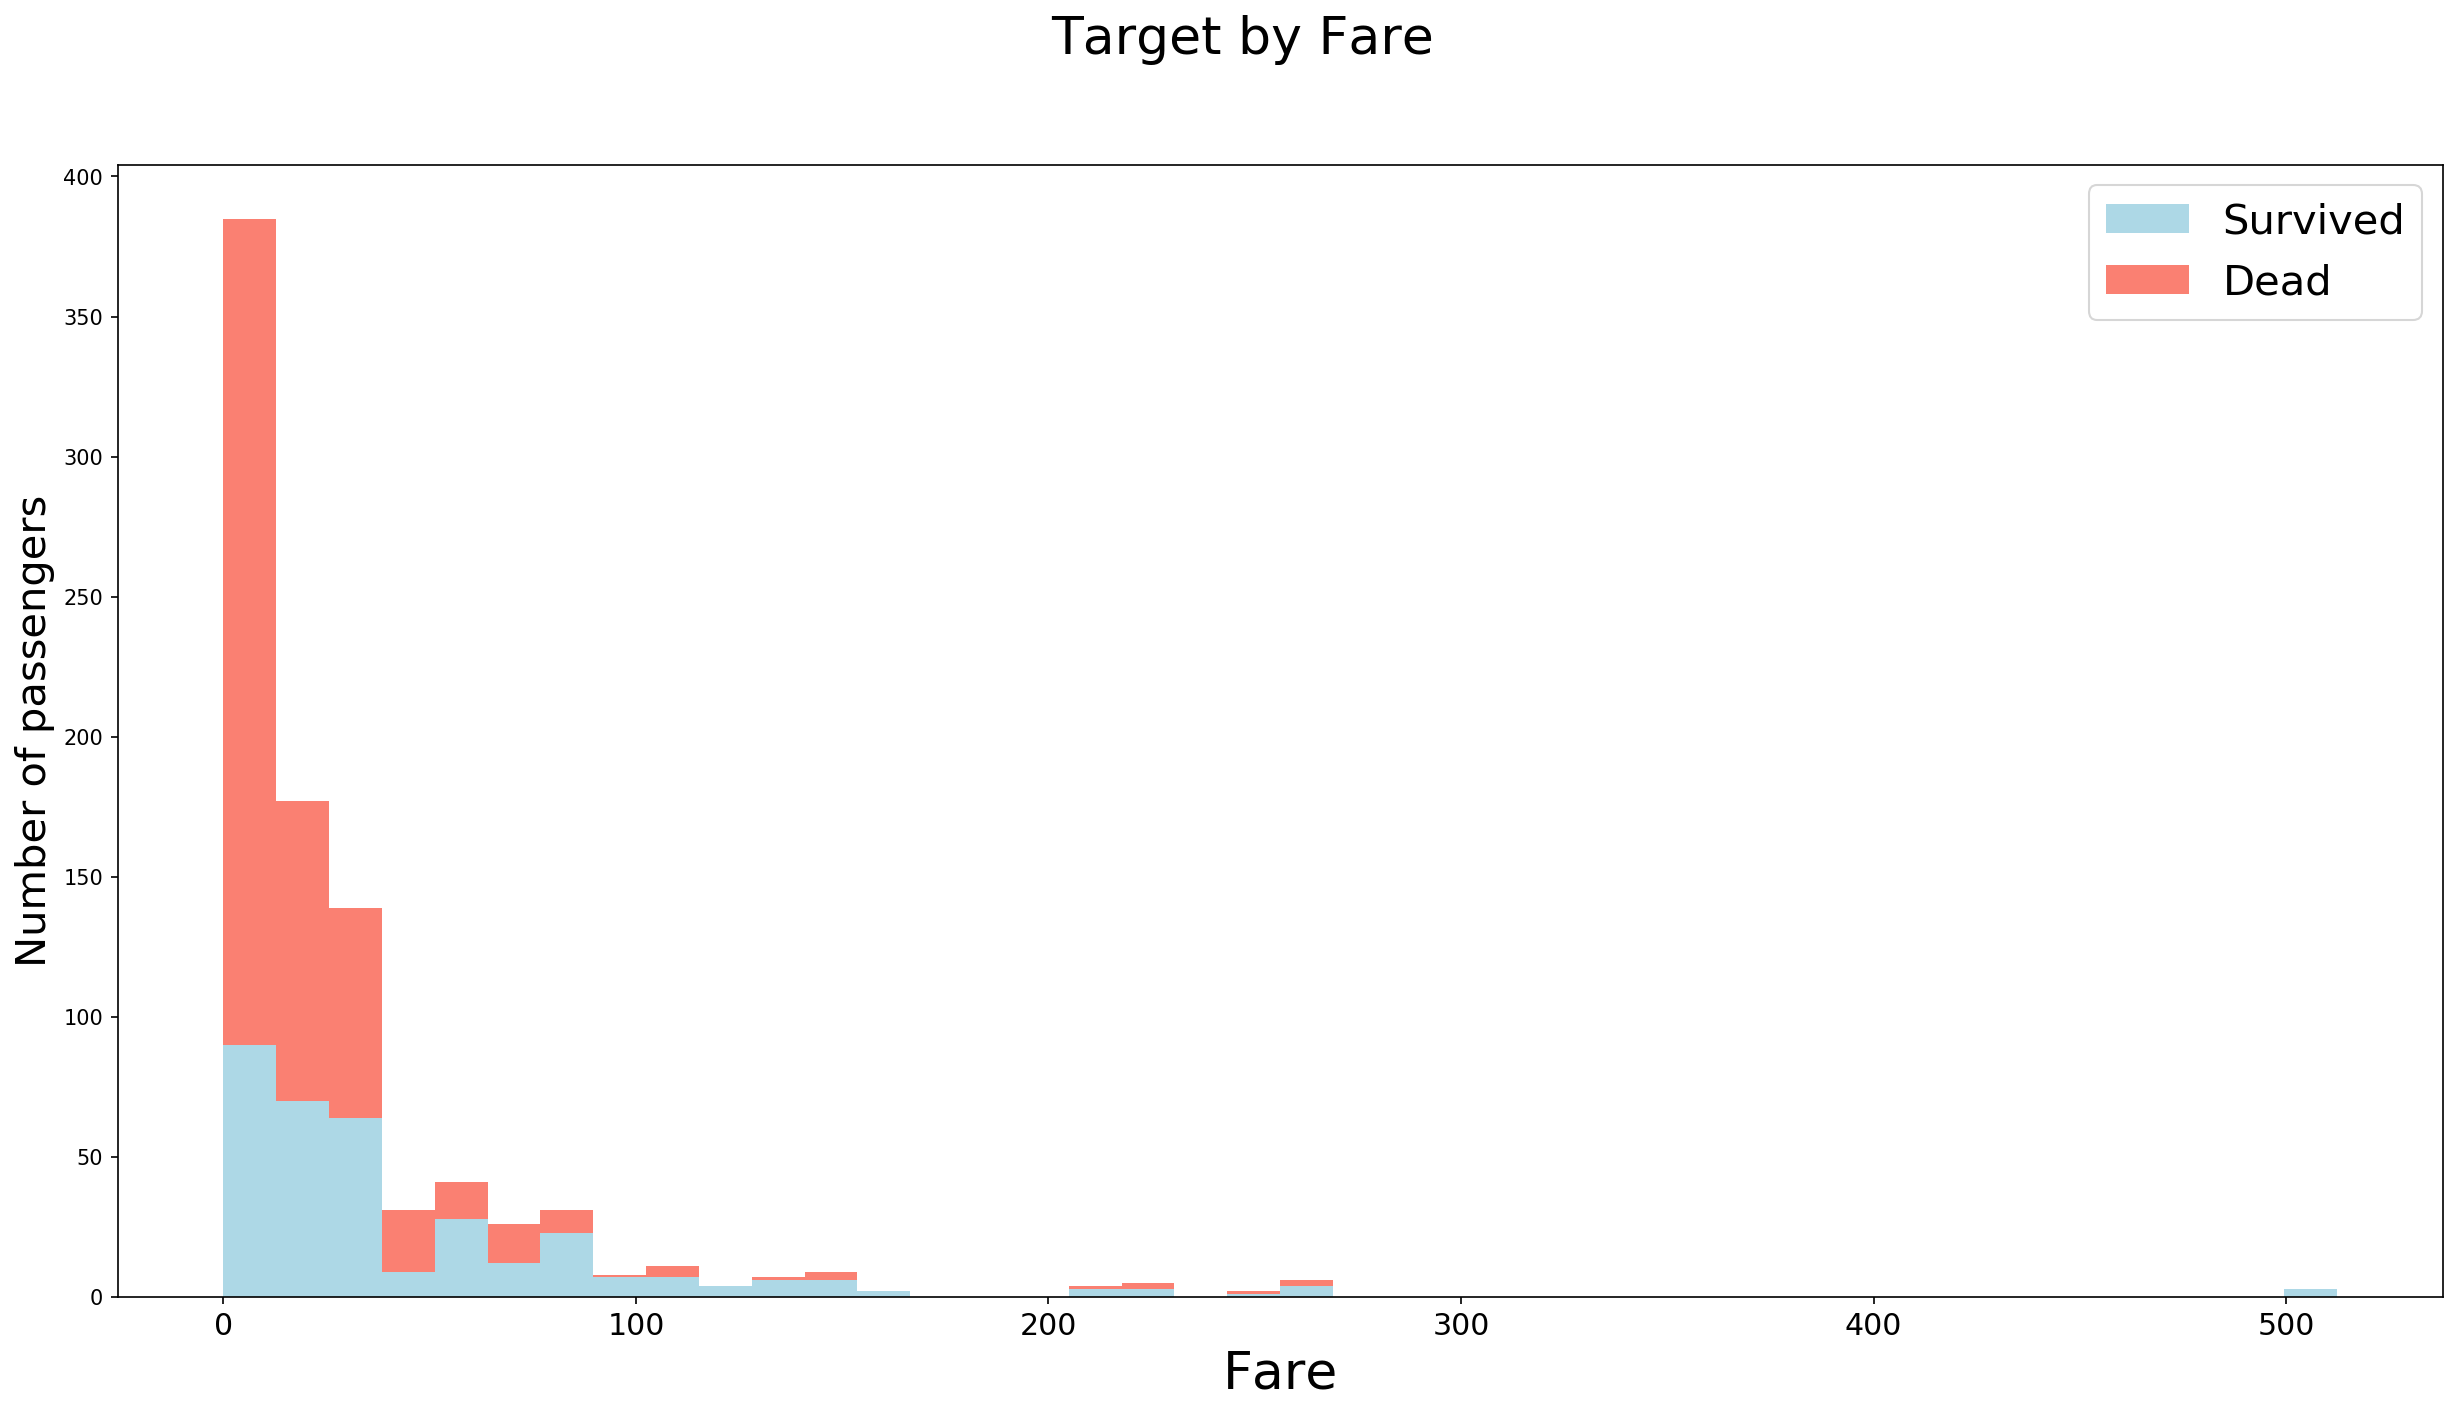

In [64]:
figure = plt.figure(figsize=(20, 10))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color=["lightblue", "salmon"],
         bins = 40, label = ['Survived','Dead'])
plt.suptitle("Target by Fare", fontsize=25)
plt.xlabel('Fare', fontsize=25)
plt.ylabel('Number of passengers', fontsize=20)
plt.legend();

Passengers with more expensive tickets, and probably a more important social status, seem to be rescued first, since passengers with cheap tickets are more likely to die.

### Target by Fare and Age

Let's now combine the age, the fare and the survival on a single chart. Our goal is to find out if they saved women and children without regarding the social status.

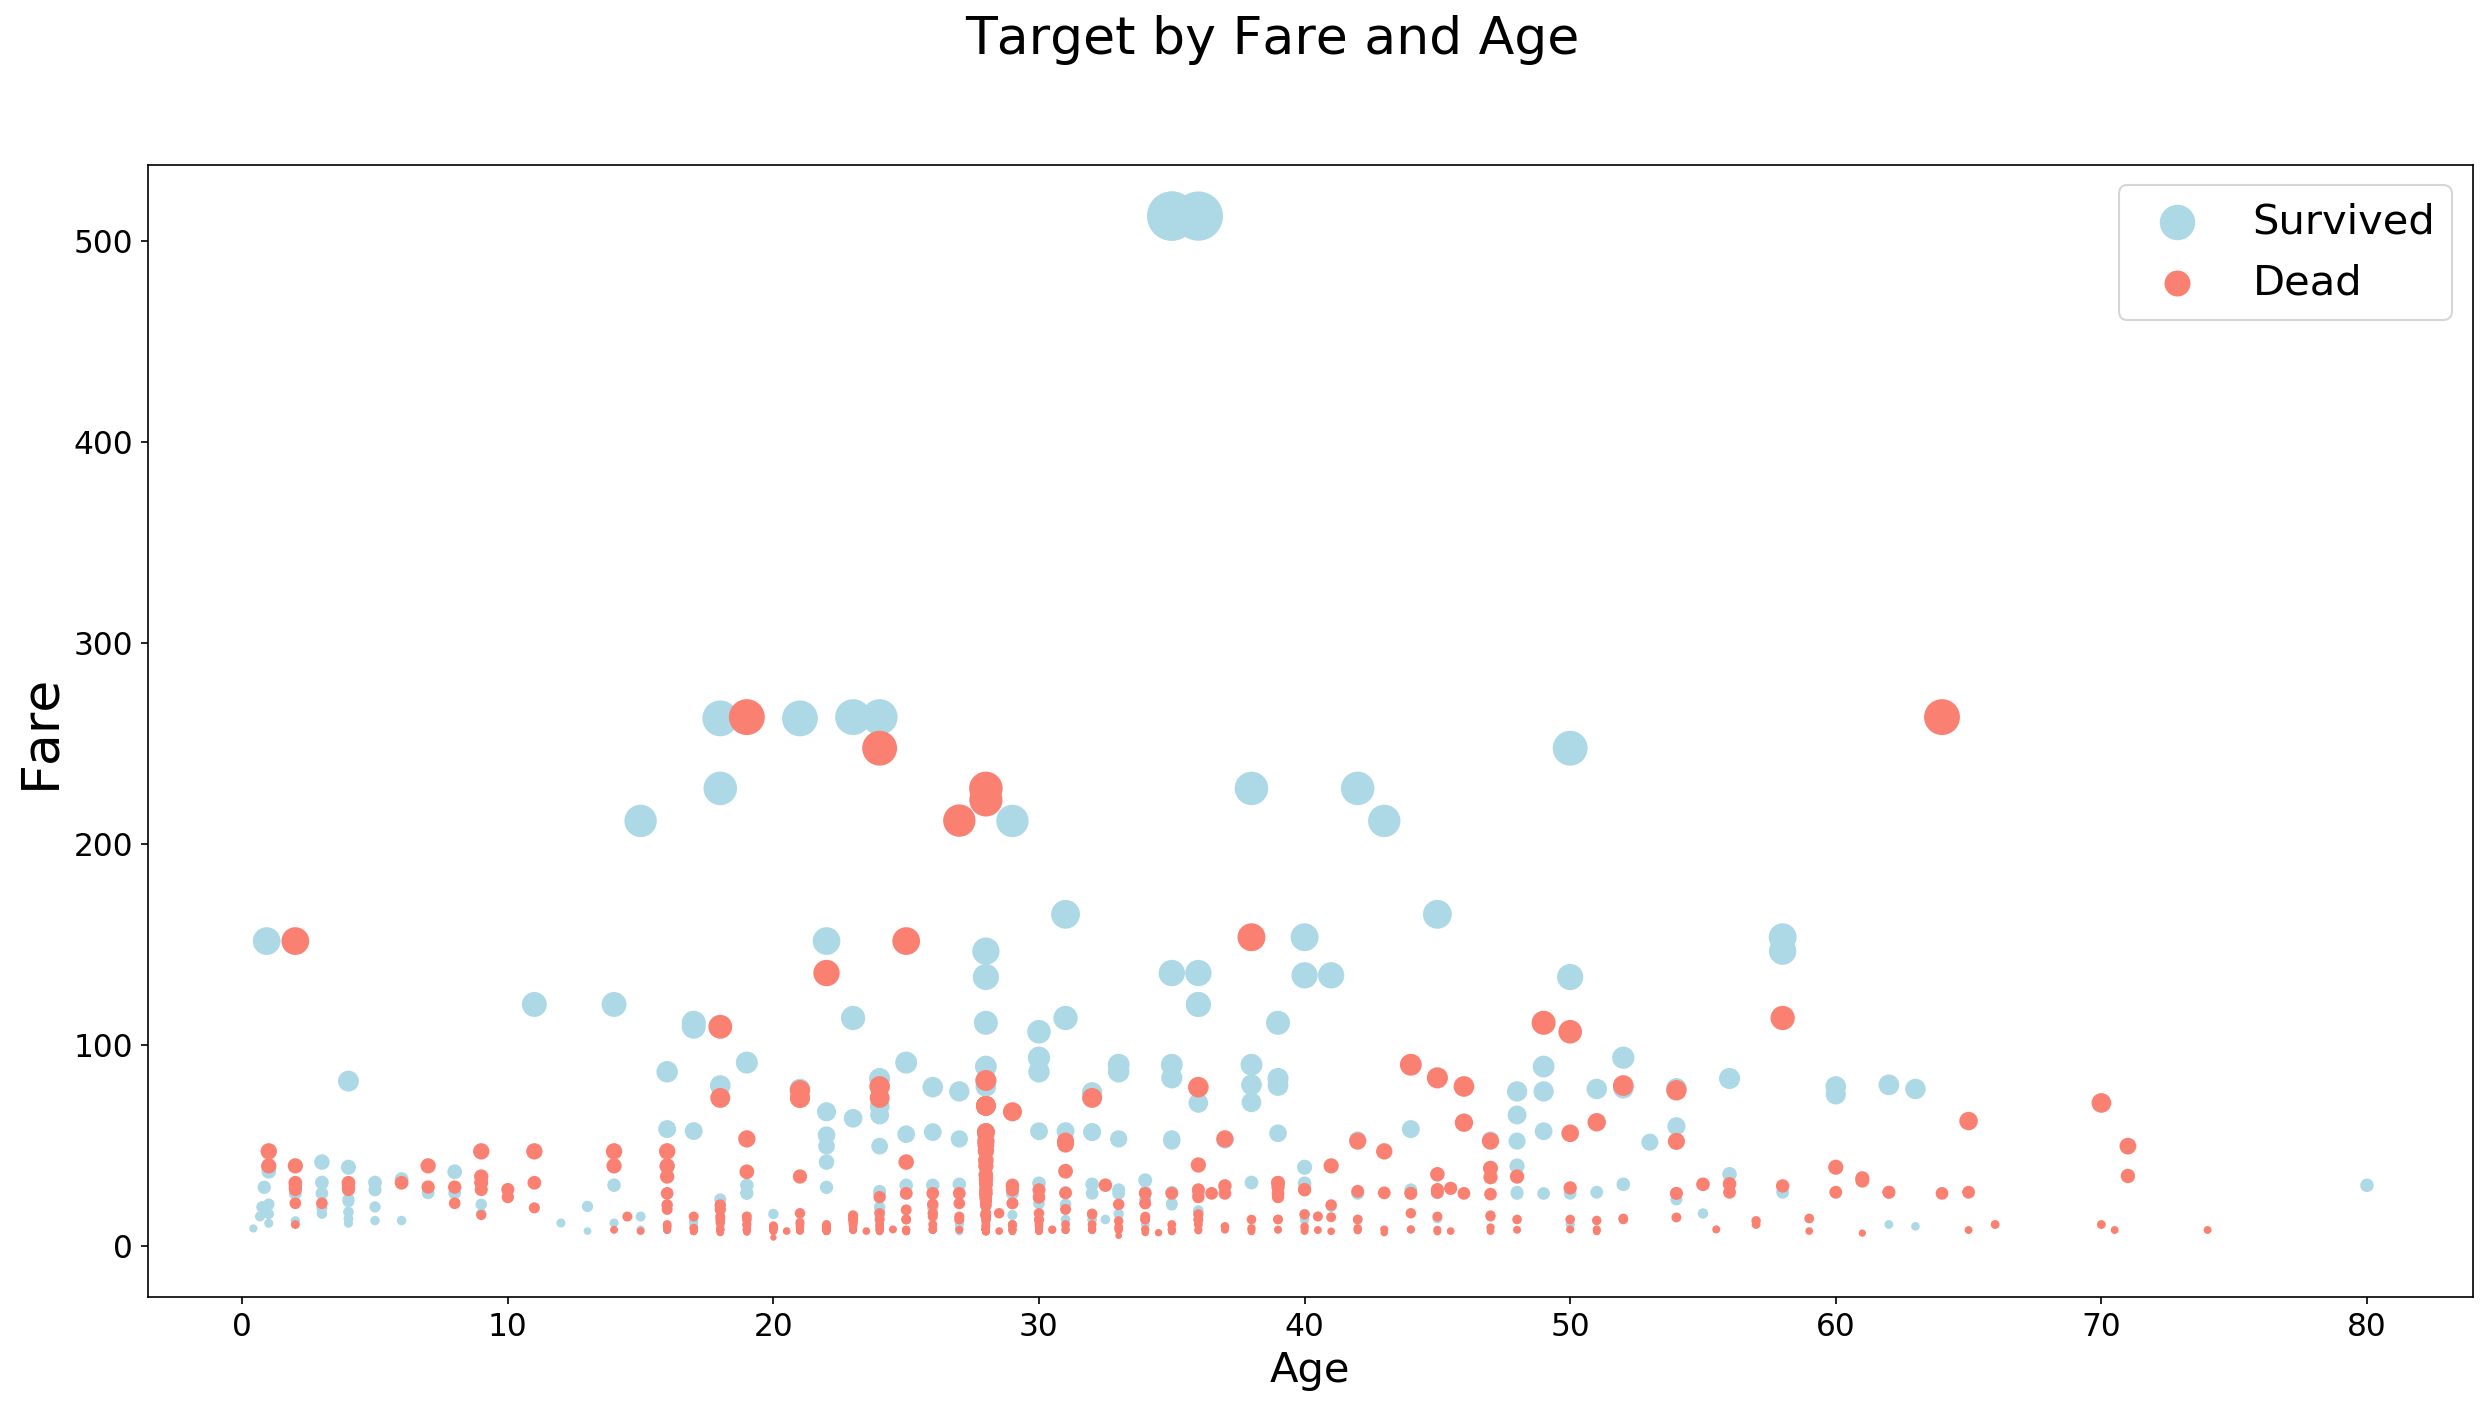

In [75]:
plt.figure(figsize=(20, 10))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='lightblue', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='salmon', s=data[data['Survived'] == 0]['Fare']);
plt.suptitle("Target by Fare and Age", fontsize=25)
plt.ylabel('Fare', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Age', fontsize=20)
ax.legend(["Survived", "Dead"], fontsize=20);

The size of the circles is proportional to the ticket fare.

We can observe different clusters:

1. Large blue dots in `Age` between 20 and 45: adults young with the largest ticket fares survived.
2. Small salmon dots in `Age` between 10 and 45, adults from lower classes on the boat with same age as before died.
3. Small blue dots in `Age` between 0 and 7: these are the children that were saved, since *Women and children FIRST"*

We assumed the Fare is connected to the social status but how? In order to find out, we can see the correlation through the next graph, which is about the Class and Fare

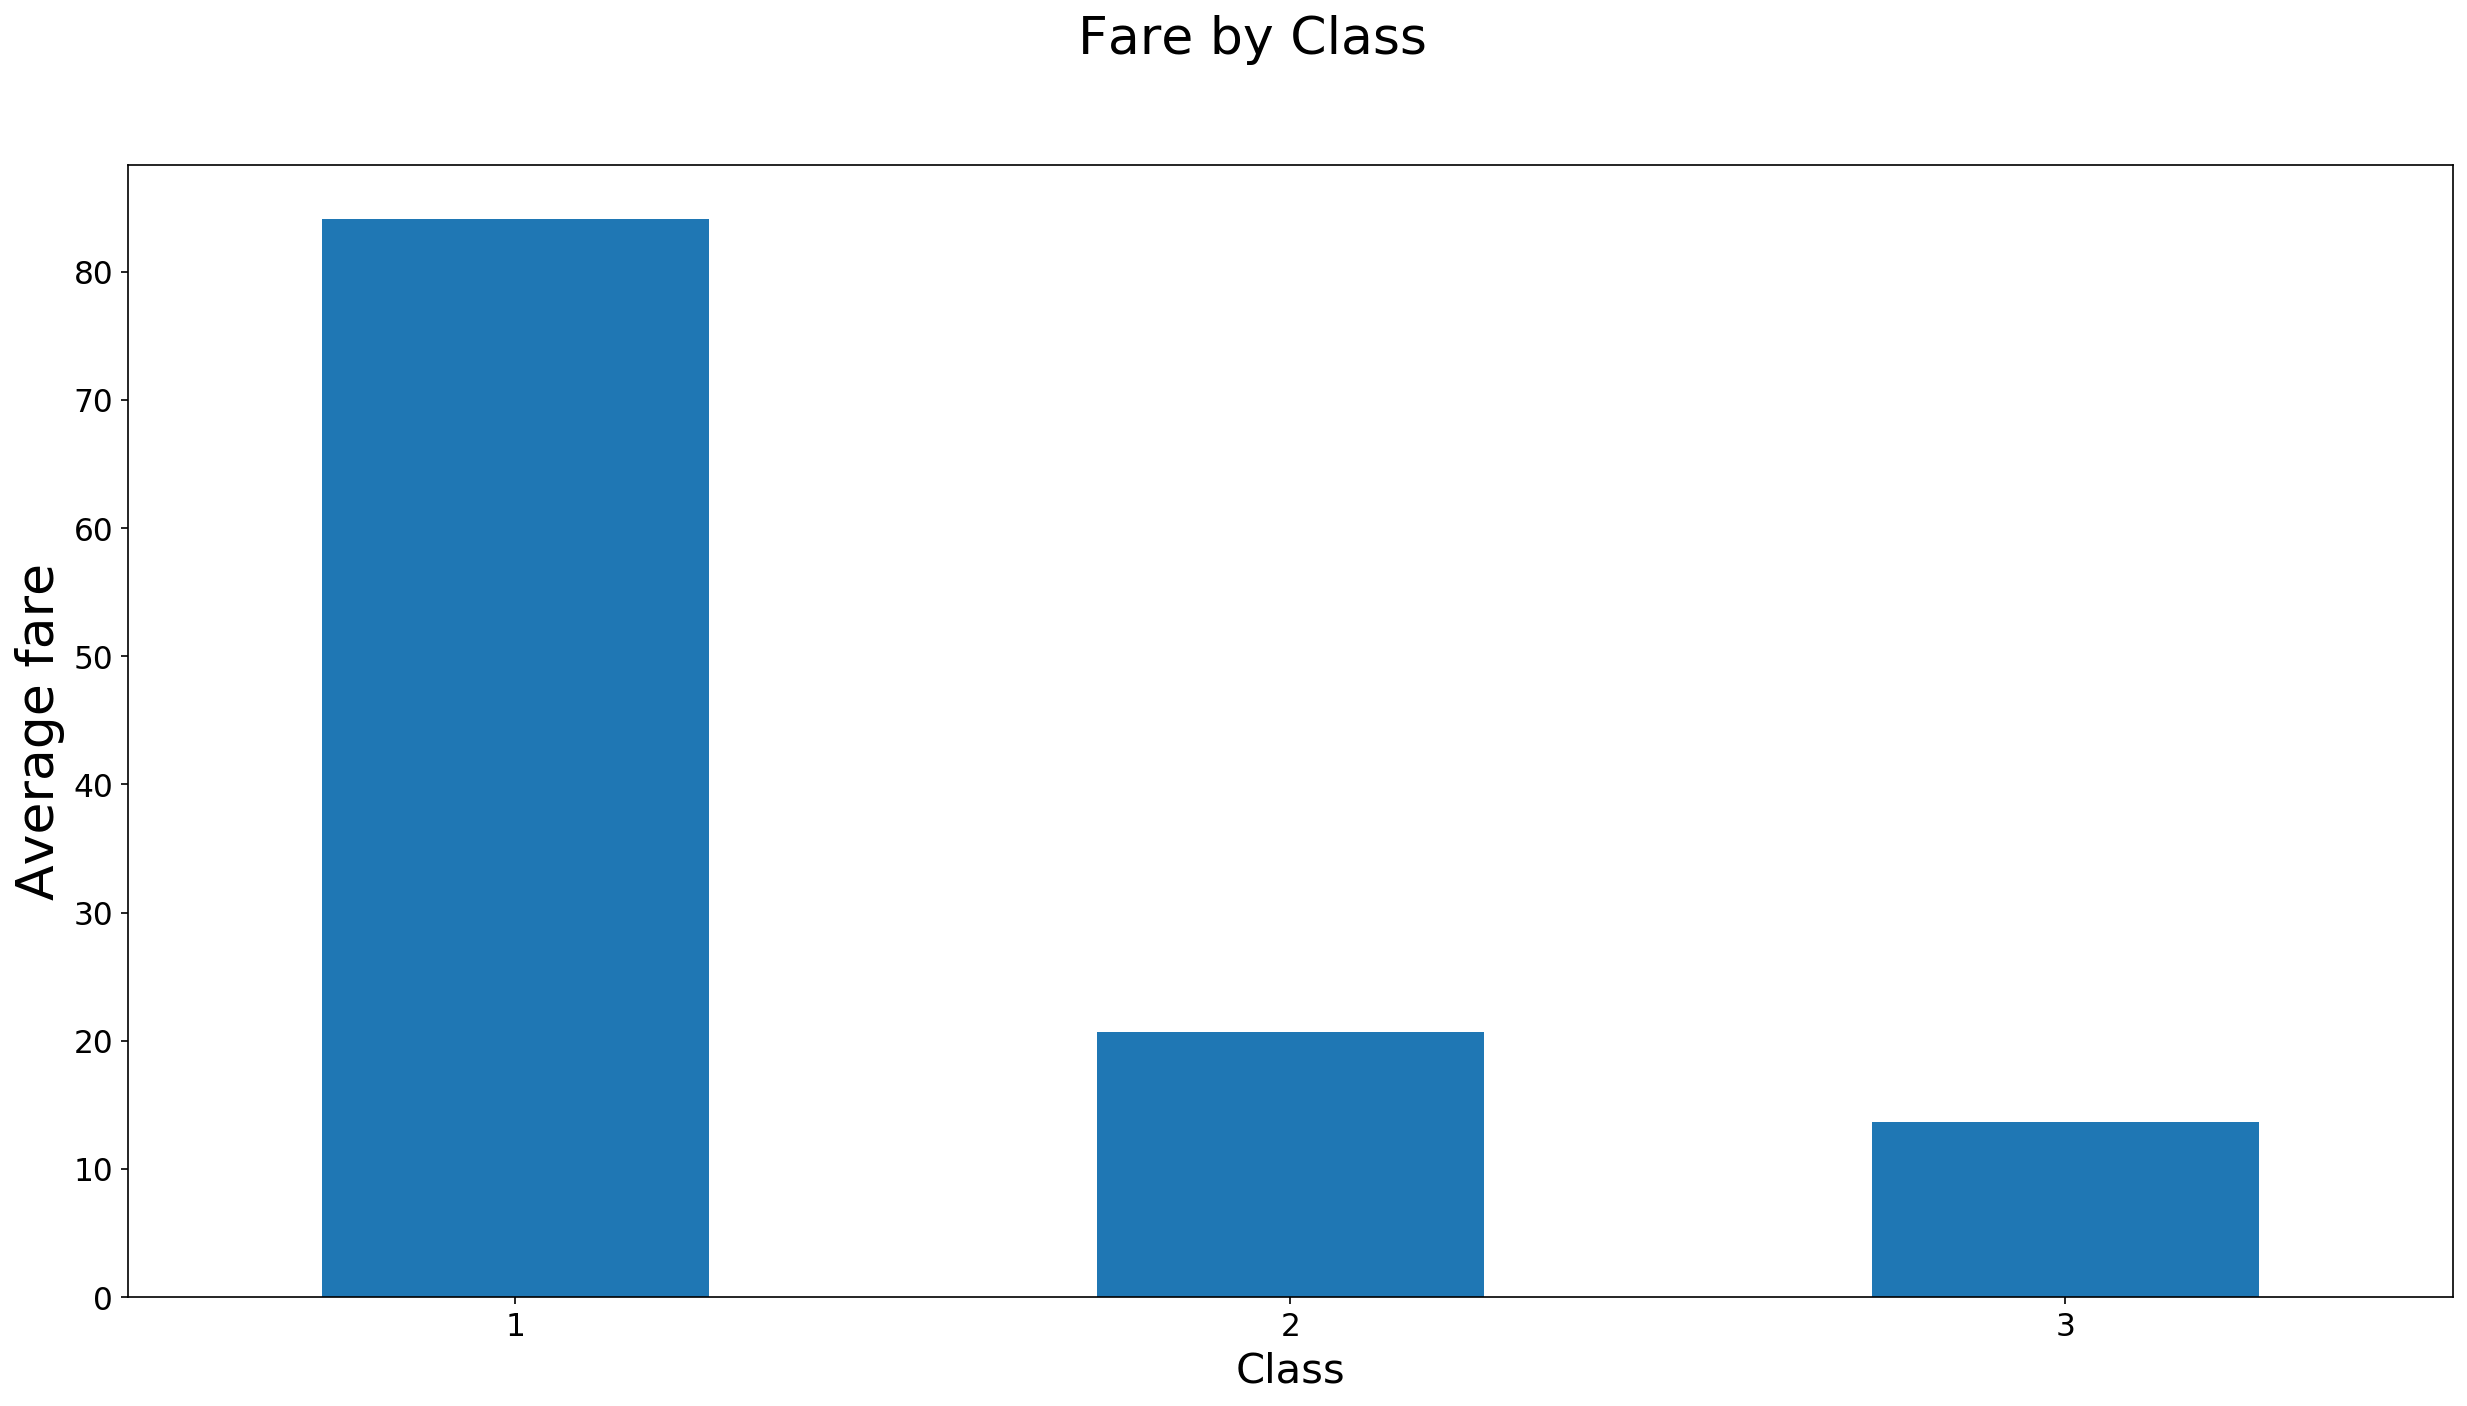

In [87]:
ax = plt.subplot()
ax.set_ylabel('Average fare', fontsize=25)
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(20, 10), ax = ax);
plt.suptitle("Fare by Class", fontsize=25)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Class', fontsize=20);

### Target by Embarkation Site

Let's now see how the embarkation site affects the survival.

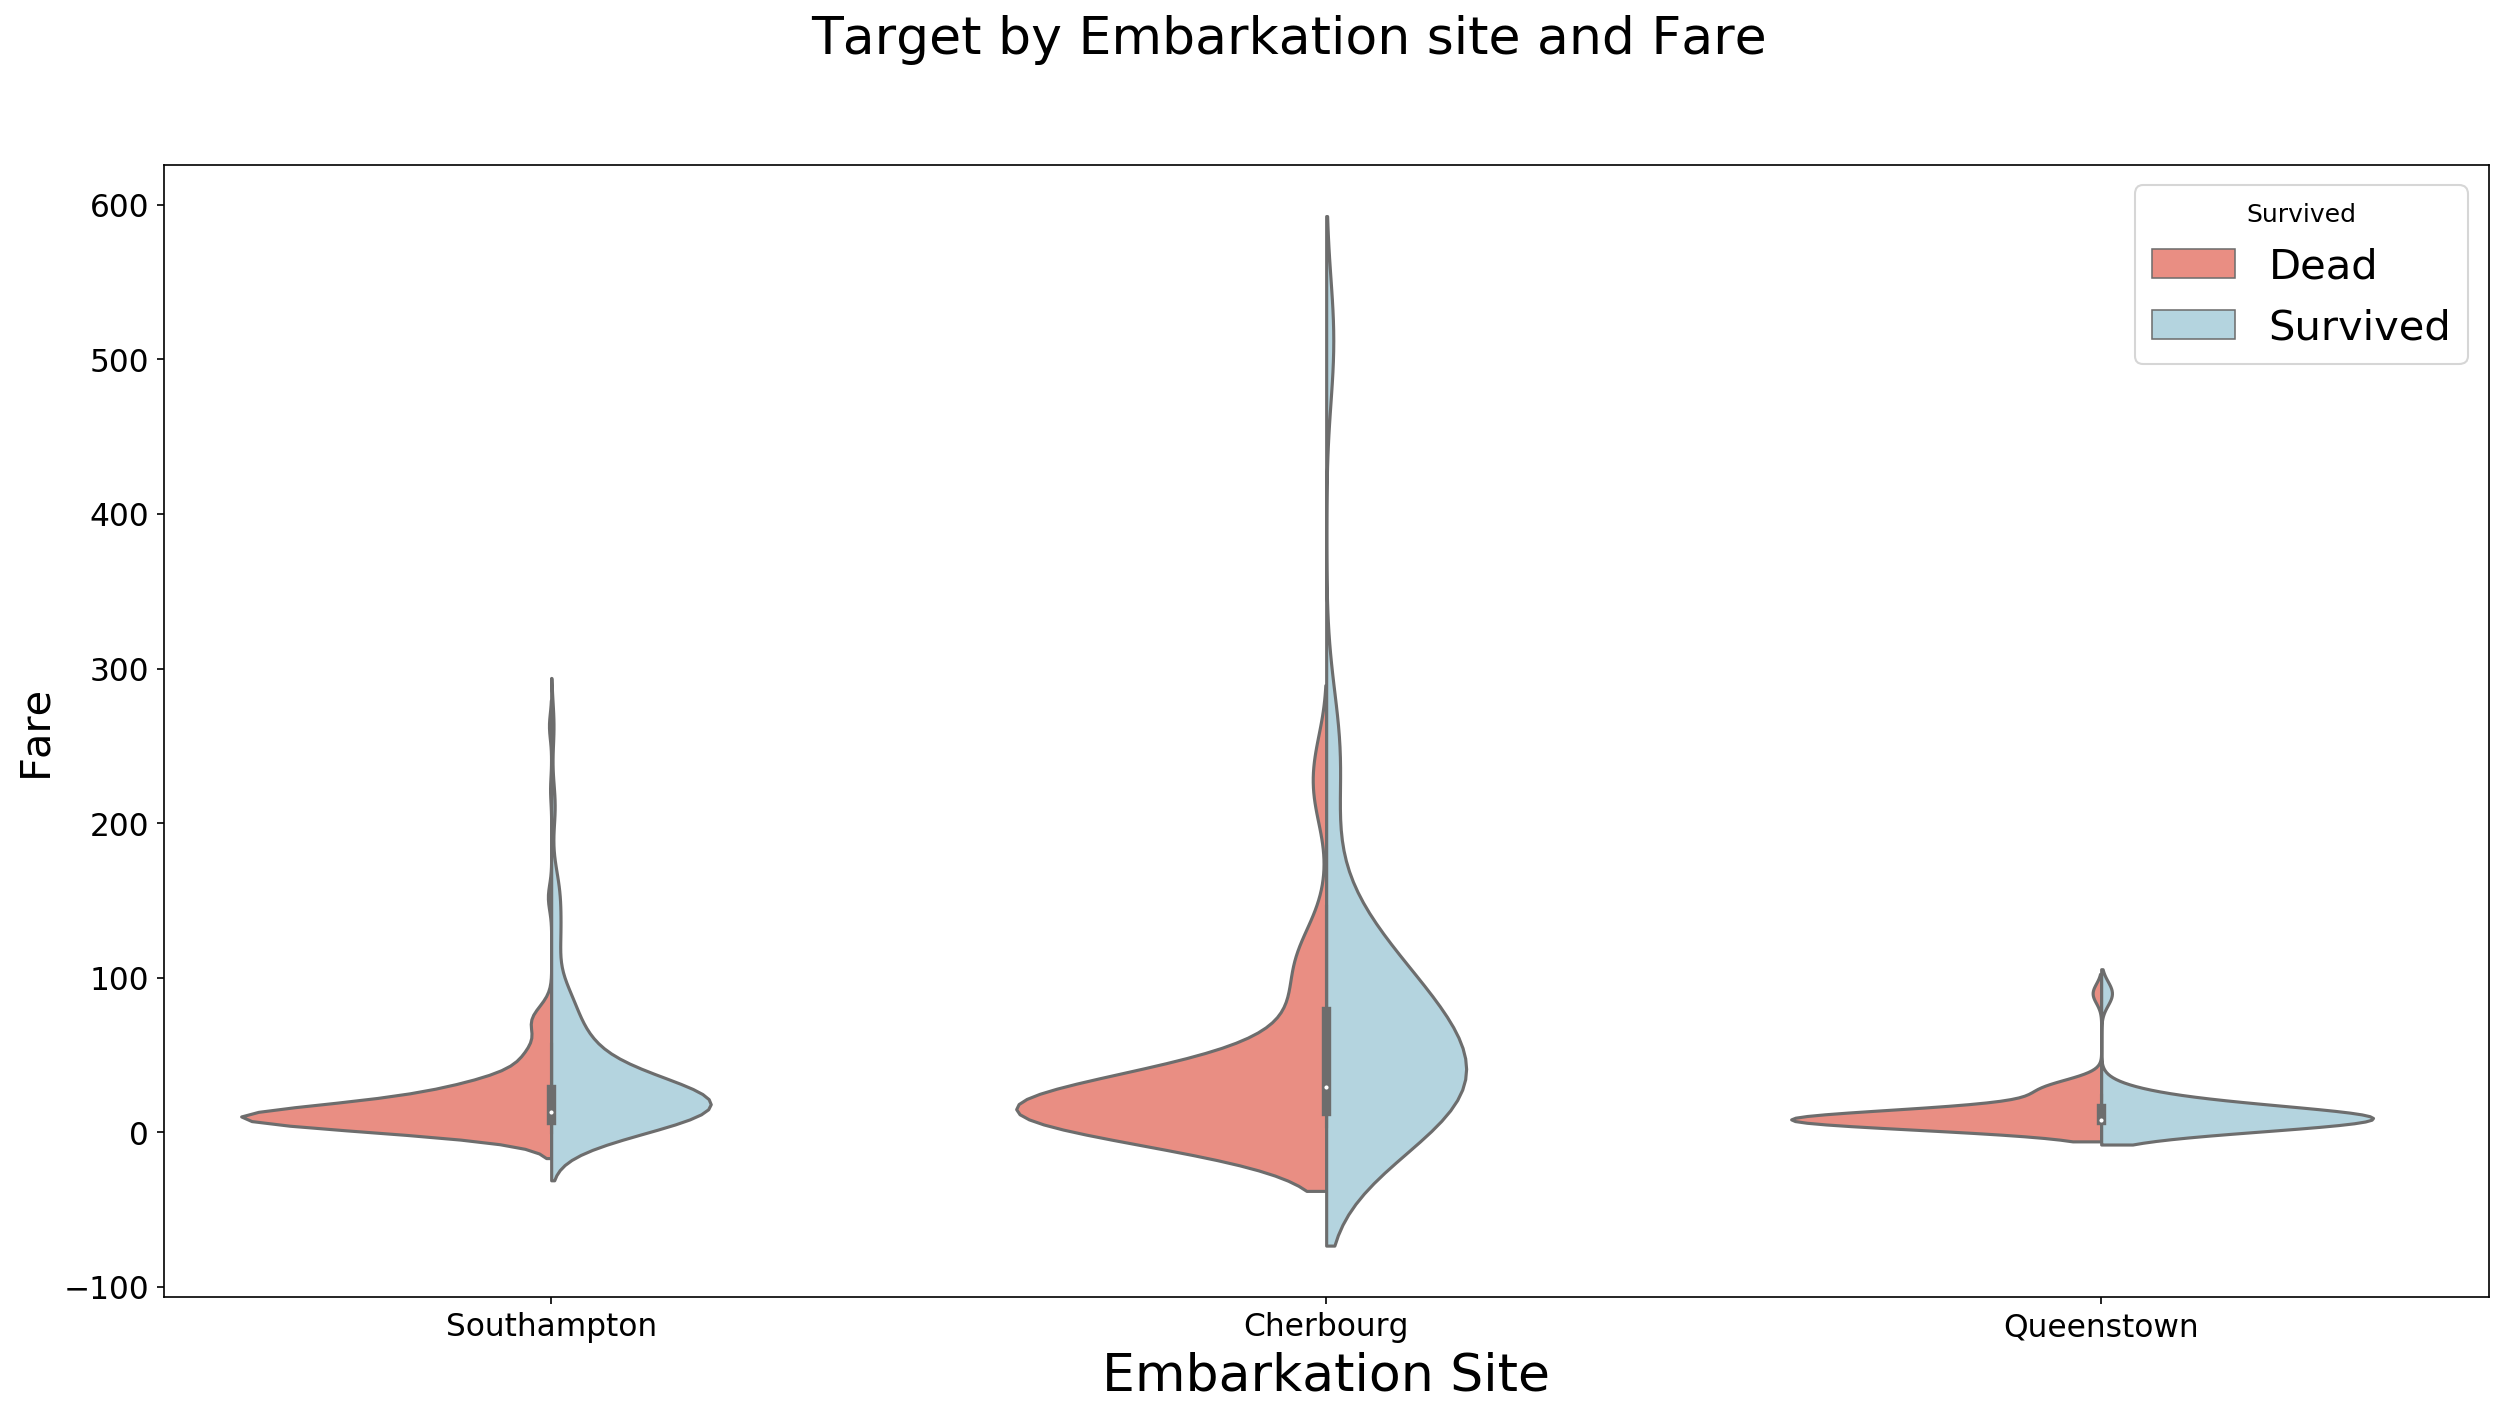

In [104]:
fig = plt.figure(figsize=(20, 10))
sns.violinplot(x='Embarked', 
               y='Fare', 
               hue='Survived', 
               data=data_violin, 
               split=True, 
               palette={"Survived": "lightblue", "Dead": "salmon"});
fig.suptitle("Target by Embarkation site and Fare", fontsize=25)
plt.xlabel("Embarkation Site", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Fare", fontsize=20);

It seems that the embarkation Cherbourg have a wider range of fare tickets and therefore the passengers who pay the highest prices are those who survive. This is because Cherbourg was the main site to leave for America. 

We also see this happening in Southampton and less in Queenstown, which was the last embarkation site, hence the cheaper.

This ends the EDA.